## Limpeza e Tratamentos de dados

In [5]:
#Importação de bibliotecas

import pandas as pd
import seaborn as sns
import statistics as sts
import numpy as np

In [7]:
dataset = pd.read_csv('Churn.csv', sep=';' , names= ['Id', 'Score','Estado', 'Genero', 'Idade', 'Patrimonio', 'Saldo', 
                                                     'Produtos','TemCatCredito','Ativo', 'Salario', 'Saiu'], header=0)

In [21]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCatCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [6]:
dataset.shape

(999, 12)

### Explorando dados Categóricos

In [24]:
#Estado

agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

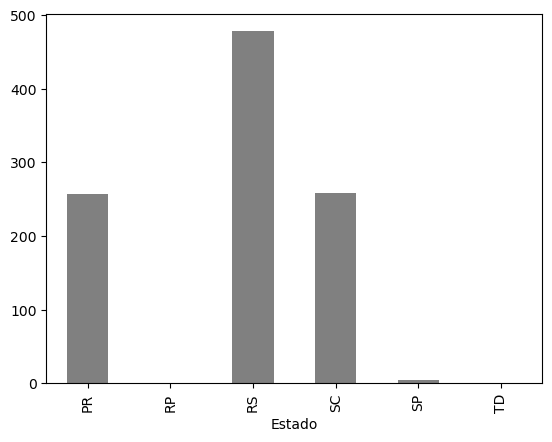

In [27]:
agrupado.plot.bar(color='gray')

In [30]:
#Genero

agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Genero'>

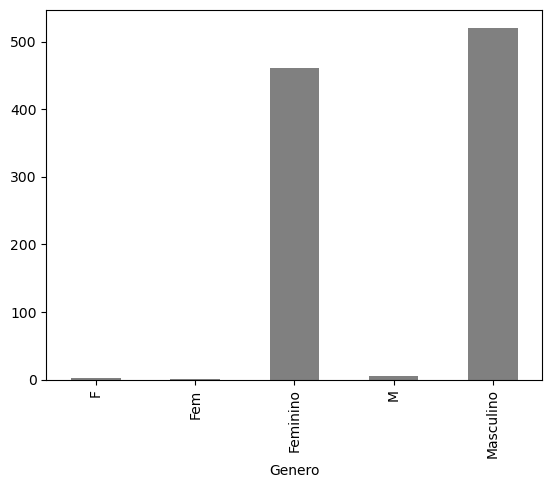

In [32]:
agrupado.plot.bar(color='gray')

### Explorando dados Numéricos

In [34]:
#Score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

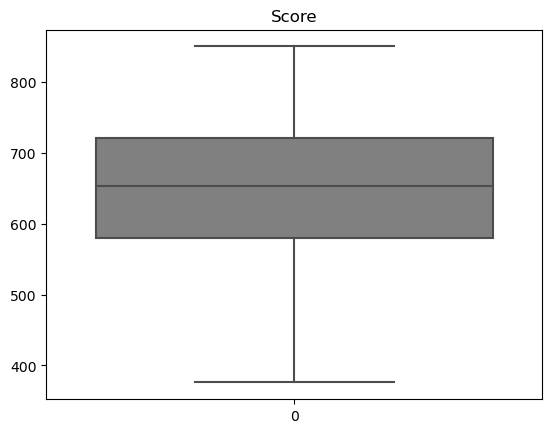

In [42]:
sns.boxplot(dataset['Score'], color= 'gray').set_title('Score')

Text(0.5, 1.0, 'Score')

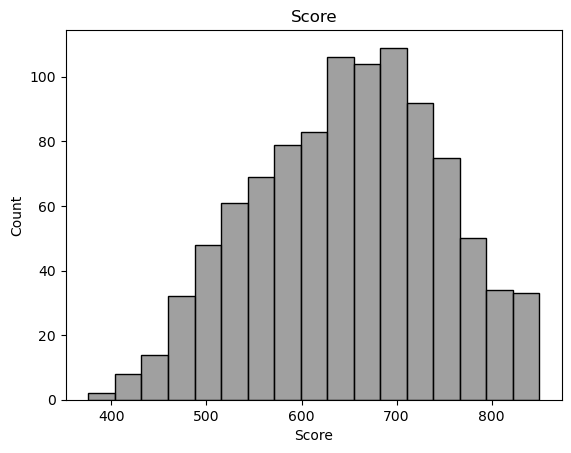

In [43]:
sns.histplot(dataset['Score'], color='gray').set_title('Score')

In [50]:
#Idade

dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

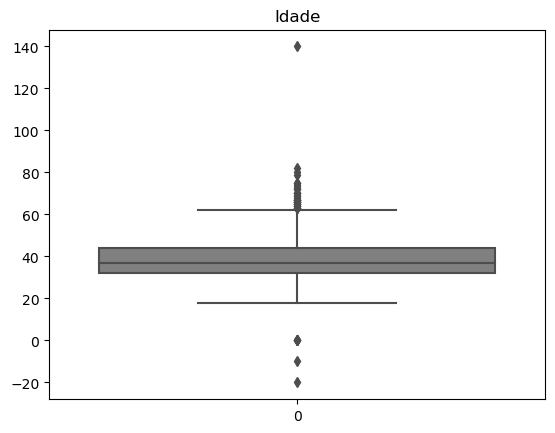

In [51]:
sns.boxplot(dataset['Idade'], color='gray').set_title('Idade')

Text(0.5, 1.0, 'Idade')

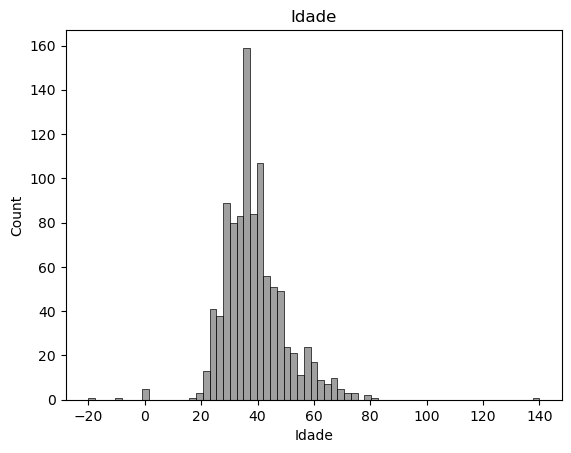

In [52]:
sns.histplot(dataset['Idade'], color='gray').set_title('Idade')

In [55]:
#Saldo

dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

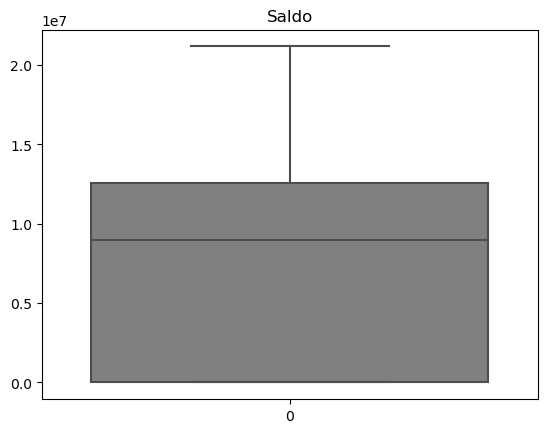

In [57]:
sns.boxplot(dataset['Saldo'] , color='gray').set_title('Saldo')

Text(0.5, 1.0, 'Saldo')

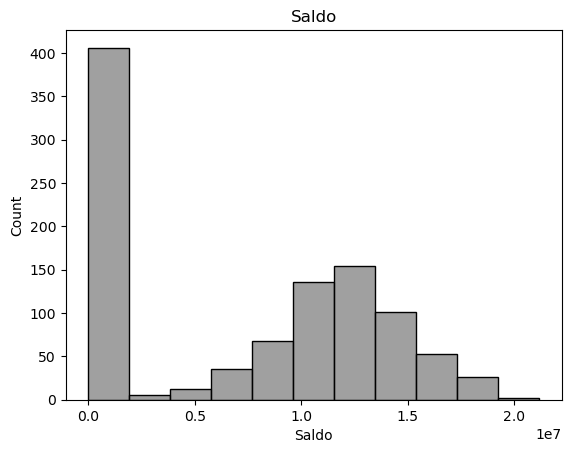

In [60]:
sns.histplot(dataset['Saldo'] , color='gray').set_title('Saldo')

In [61]:
#Salario

dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

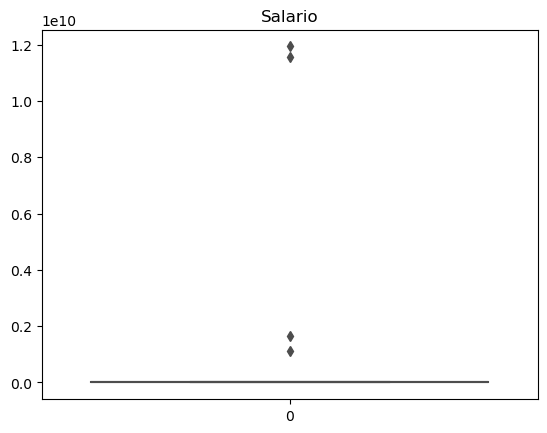

In [62]:
sns.boxplot(dataset['Salario'], color='gray').set_title('Salario')

Text(0.5, 1.0, 'Salario')

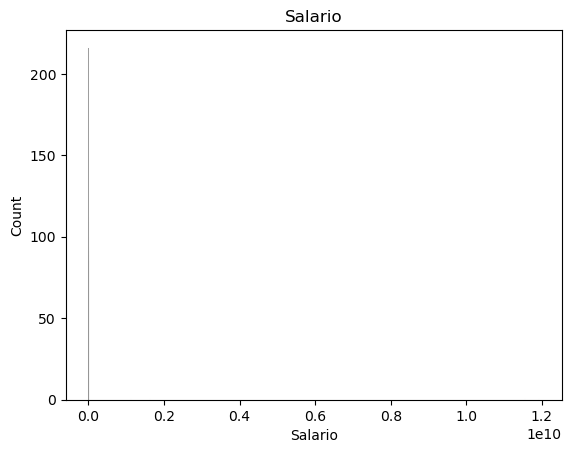

In [67]:
sns.histplot(dataset['Salario'], color='gray').set_title('Salario')

### Tratando os dados

In [68]:
#Explorando valores NAN das colunas
dataset.isnull().sum()

Id               0
Score            0
Estado           0
Genero           8
Idade            0
Patrimonio       0
Saldo            0
Produtos         0
TemCatCredito    0
Ativo            0
Salario          7
Saiu             0
dtype: int64

In [69]:
#Descobrindo a mediana do Salario

mediana = sts.median(dataset['Salario'])
mediana

70518.0

In [73]:
#Substituindo NAS pela mediana

dataset['Salario'].fillna(mediana, inplace=True)

In [74]:
#Verificando se os NAS foram removidos

dataset['Salario'].isnull().sum()

0

In [4]:
#Analisando o Gênero

agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [78]:
dataset['Genero'].isnull().sum()

8

In [80]:
#Substituindo os NAS pelo Genero Masculino

dataset['Genero'].fillna('Masculino', inplace=True)

In [82]:
#Verificando se ainda há dados nulos

dataset['Genero'].isnull().sum()

0

In [10]:
#Padronização dos dados do Gênero

dataset.loc[dataset['Genero']=='M', 'Genero']='Masculino'
dataset.loc[dataset['Genero'].isin(['F', 'Fem']) , 'Genero']='Feminino'

#Visualizando o resultado

agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    527
dtype: int64

In [94]:
#Idades fora do domínio

dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [97]:
#Visualizando dados fora da regra

dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCatCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [16]:
#Calculando a Mediana

mediana = sts.median(dataset['Idade'])
mediana

37

In [18]:
#Substituindo as idades pela mediana

dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120), 'Idade'] = mediana

In [20]:
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCatCredito,Ativo,Salario,Saiu


In [22]:
#Dados duplicados, buscando pelo ID

dataset[dataset.duplicated(['Id'] , keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCatCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [24]:
#Excluindo Duplicados pelo ID

dataset.drop_duplicates(subset='Id', keep='first', inplace=True)

#Verificando se ainda há duplicados

dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCatCredito,Ativo,Salario,Saiu


In [26]:
#Estados fora do Domínio

agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [29]:
#Atribuindo valores fora do domínio para RS

dataset.loc[dataset['Estado'].isin(['RP', 'SP', 'TD']), 'Estado'] = 'RS'
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [10]:
#Tratando outliers da coluna salário

desv = np.std(dataset['Salario'])
desv

530312491.44100344

In [11]:
#definir como padrão os valores que possuem até 2 vezes o desvio padrão

dataset.loc[dataset['Salario'] >= 2*desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCatCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [14]:
#Substituindo valores fora do padrão pela mediana

mediana = sts.median(dataset['Salario'])
mediana

70518.0

In [18]:
#Atibuindo valores para a mediana

dataset.loc[dataset['Salario'] >= 2*desv, 'Salario'] = mediana

In [20]:
#Checando se foi aplicada a condição em todos os registros

dataset.loc[dataset['Salario'] >= 2*desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCatCredito,Ativo,Salario,Saiu


In [22]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCatCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [24]:
#Verificando a quantidade de linhas e colunas sem os dados duplicados 
dataset.shape

(999, 12)